We use Euler scheme to simulate a path for SDE of the form
$$X(t) = x_0 + \int_0^t \mu(X(s), s)ds + \int_0^t \sigma(X(s), s)dW(s).$$

__Ref__

[Hir13] Computational Methods in Finance

Section 6.6.1 of [Hir13] provides Euler schemem as follows:
One can produce a sequence of pairs $(t_j, \hat X_j): j = 0, 1, \ldots$ by
$$\hat X_{j+1} = \hat X_j + \mu(\hat X_j, t_j) \Delta t_j + \sigma(\hat X_j, t_j) \sqrt{\Delta t_j} Z_j,$$
where
$\Delta t_j = t_{j+1} - t_j$ and $(Z_j)_{j\ge 0}$ is iid standard normal variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Next, we show simulation for the BM

Initial state is 0.0

At state x = 1.0 time t = 5.0

Mu 0.0

Sigma = 1.0



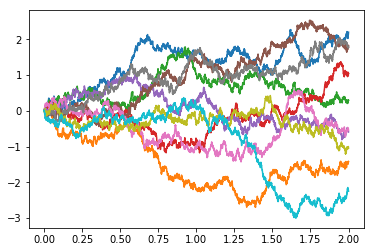

In [2]:
%run SDE_V01.py

Below, we demonstrate Euler method with SDE class with P254-2-a of [Hir13] as an example

In [3]:
#define function Mu and Sigma
#Here we define as of P254-2-a of [Hir13] for the illustration
r = .0475; sig = .2
Mu = lambda x,t: r*x
Sigma = lambda x,t: sig*x
x0 = 100. #init state

In [4]:
from SDE_V01 import SDE

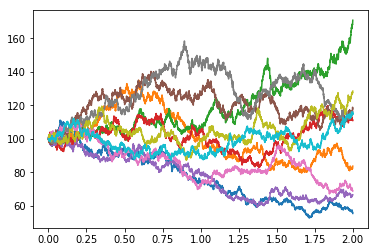

In [5]:
iGBM = SDE(Mu, Sigma, x0)
for i in range(10): 
    [t, Y, W] = iGBM.Euler(2., 4000); 
    plt.plot(t,Y);

In [6]:
#Use MC to compute the put price of p254-2-a
#first define a function of Put payoff
def PutPay(r, T, K, S_T):
    return np.exp(-r*T)*max(0,K-S_T)
T = 5.
K = 110.
MeshL = .005
MeshN = int(T/MeshL)
IterN = 1000

iStk = SDE(Mu, Sigma, x0)

PPay = np.zeros(IterN) #Simulation of payoff

for i in range(IterN):
    [t, Xh, Wh] = iStk.Euler(T, MeshN);
    PPay[i] = PutPay(r, T, K, Xh[-1])
    
PPrice = PPay.mean()   

In [7]:
PPrice #By Euler

10.652908068745353

In [8]:
from GBM_V01 import GBM

In [9]:
iGBM = GBM(r, sig, x0)
iPut = iGBM._Put_(K, T)
print(iPut)

5.091523362894591


Initial state is 10

At state x = 20.0 time t = 5.0

Mu 1.0

Sigma = 4.0

call value is 1.6699448408416009
put value is 0.23100966134802725


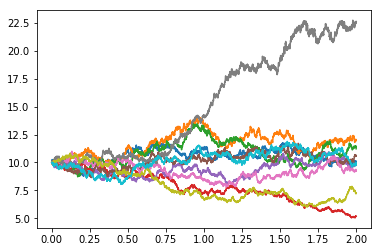

In [10]:
%run GBM_V01.py

In [11]:
ArrayN = np.arange(8)
startn = 4
ArrayErr = np.zeros(ArrayN.size)
T = 1.

iGBM = GBM(.05, .2, 10)

for n in ArrayN:
    MeshNum = np.power(2, n+startn)
    SampleNum = 200
    errsum = 0
    for i in range(SampleNum):
        [t, Xh, Wh] = iGBM.Euler(T, MeshNum)
        XhT = Xh[-1]
        XT = iGBM._explicit_sol_(T, Wh[-1])
        errsum = errsum + np.abs(XhT - XT)
    ArrayErr[n] = errsum/SampleNum
    
    

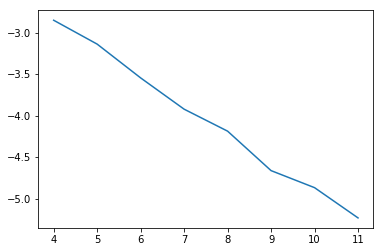

In [14]:
plt.plot(ArrayN+startn, np.log(ArrayErr))

In [15]:
(np.log(ArrayErr[-1]) - np.log(ArrayErr[0]))/(ArrayN[-1] - ArrayN[0])

-0.3401510160628701